# Richardson-Lucy-Entfaltung auf OpenCL-kompatiblen GPUs
[Richardson-Lucy-Entfaltung](https://en.wikipedia.org/wiki/Richardson%E2%80%93Lucy_deconvolution) ist ein gängiger und doch grundlegender Algorithmus zur Bildentfaltung in der Mikroskopie. In diesem Notebook werden wir eine GPU-beschleunigte Version davon verwenden, die im napari-Plugin [RedLionFish](https://github.com/rosalindfranklininstitute/RedLionfish) implementiert ist. Daher können Sie denselben Algorithmus auch über die grafische Benutzeroberfläche in napari verwenden.

In [1]:
from skimage.io import imread
from pyclesperanto_prototype import imshow
import RedLionfishDeconv as rl
import matplotlib.pyplot as plt

Wir werden ein Bild laden, das die Fluoreszenzintensität entlang von Linien zeigt. Dieses 3D-Bild wurde mit einem Konfokalmikroskop aufgenommen.

In [2]:
image = imread('../../data/DeconvolutionSampleVerticalGrid1AU-crop.tif')
image.shape

(21, 150, 150)

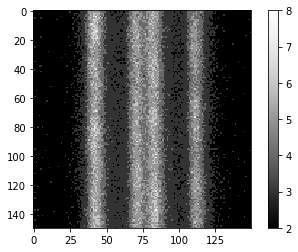

In [3]:
imshow(image, colorbar=True)

Das folgende PSF-Bild wurde aus Bildern extrahiert, die mit demselben Mikroskop aufgenommen wurden, unter Verwendung des [zuvor erklärten](deconvolution:extract_psf) Verfahrens.

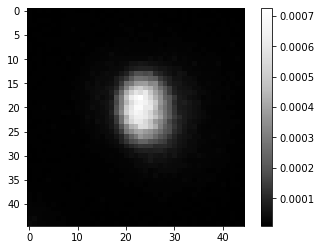

In [4]:
psf = imread('../../data/psf.tif')

imshow(psf, colorbar=True)

Wir können nun das Bild mit dem Richardson-Lucy-Entfaltungsalgorithmus von RedLionFish entfalten. Wir sollten angeben, dass der Algorithmus auf der `gpu` ausgeführt werden soll.

ERROR:root:Failed to setup Reikna with OpenCL.
ERROR:root:No module named 'reikna'


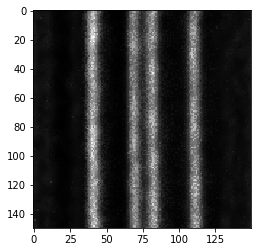

In [5]:
iterations = 50

deconvolved = rl.doRLDeconvolutionFromNpArrays(image, 
                                               psf, 
                                               niter=iterations, 
                                               method='gpu', 
                                               resAsUint8=False )
imshow(deconvolved)

Um genauer zu visualisieren, wie sich das Originalbild und die entfaltete Version unterscheiden, können wir die Intensität entlang einer Linie von links nach rechts plotten. Wir erhalten diese Zahlen aus einer Maximumintensitätsprojektion entlang der Z-Achse.

In [6]:
max_intensity_image = image.max(axis=0)
max_intensity_image.shape

(150, 150)

In [7]:
max_intensity_deconvolved = deconvolved.max(axis=0)
max_intensity_deconvolved.shape

(150, 150)

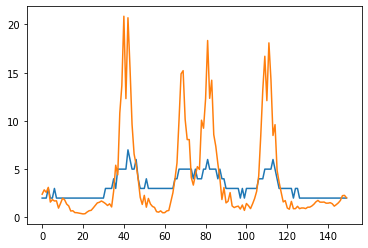

In [8]:
plt.plot(max_intensity_image[80])
plt.plot(max_intensity_deconvolved[80])
plt.show()

Wie Sie sehen können, hat sich der Intensitätsbereich durch die Entfaltung verändert. Dies hängt vom Algorithmus und der Implementierung ab. Wenn Sie eine Entfaltung anwenden, sollten Sie überprüfen, ob die Gesamtintensität im Originalbild und im entfalteten Bild im gleichen Bereich liegt:

In [9]:
image.min(), image.max()

(1, 8)

In [10]:
deconvolved.min(), deconvolved.max()

(0.0, 28.122286)